* [HSV Filter](https://medium.com/dataseries/designing-image-filters-using-opencv-like-abode-photoshop-express-part-1-8765e3f4495b)

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from focus_stack.balance import img_histo, img_lumi_balance_hsv

In [2]:
base_path = "E:/Focus stacking/2024-02-04 - Coleoptera remake/"
input_path = base_path+"aligned"
output_path = "C:/Users/Luca Lista/Desktop/Temp"

balance align_0094__MG_4265.jpg.jpg -> align_0034__MG_4205.jpg.jpg: 
mean, pink: 24.5007
mean, red: 102.3632
mean, black: 108.6188


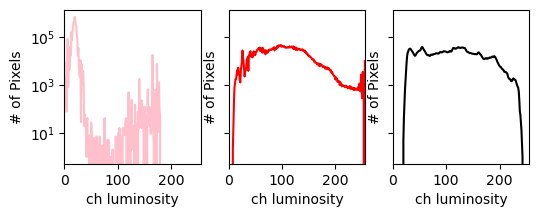


mean, pink: 48.1136
mean, red: 134.8856
mean, black: 150.3749


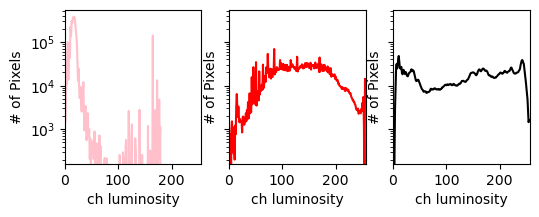


mean, pink: 48.1136
mean, red: 104.5550
mean, black: 132.5876


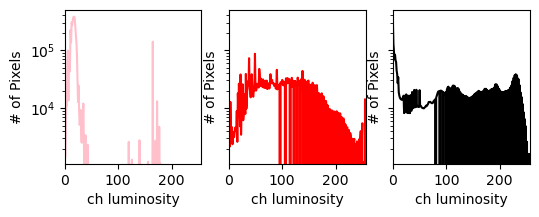

24.5007->48.1136 (+49.08%), gamma = 1.0000 
102.3632->104.5550 (+2.10%), gamma = 0.6661 
108.6188->132.5876 (+18.08%), gamma = 0.5109 


In [3]:
img_lumi_balance_hsv("align_0034__MG_4205.jpg.jpg", "align_0094__MG_4265.jpg.jpg", input_path, output_path, mask_size=0.8, i_min=20)